## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [17]:
import numpy as np
import pandas as pd

### Load and normalize our data

In [18]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


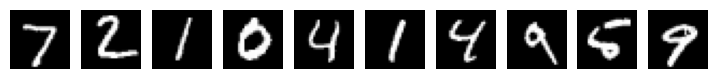

In [19]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [20]:
performance=pd.DataFrame({"model":[],"MSE-loss":[]})

### Create an autoencoder model.

In [35]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 300)               30300     
                                                                 
 dense_30 (Dense)            (None, 500)              

### Train the autoencoder model.

In [36]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1829 - val_loss: 0.1246
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1145 - val_loss: 0.1053
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1008 - val_loss: 0.0977
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0945 - val_loss: 0.0915
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0906 - val_loss: 0.0888
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0874 - val_loss: 0.0860
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0853 - val_loss: 0.0843
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0836 - val_loss: 0.0830
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0823 - val_loss: 0.0819
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0811 - val_lo

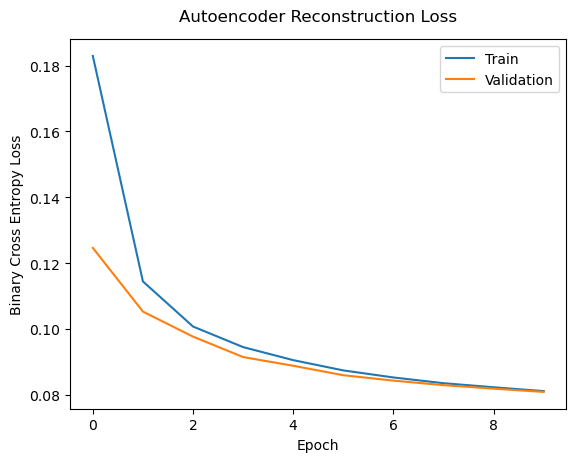

In [37]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [38]:
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 3ms/step


### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

6N

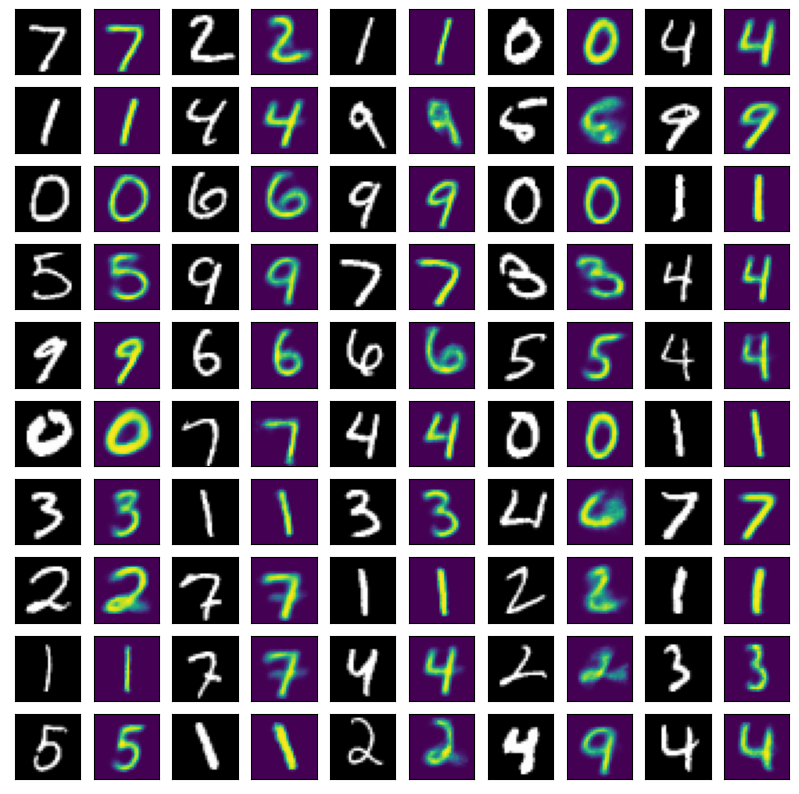

In [25]:

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

16N

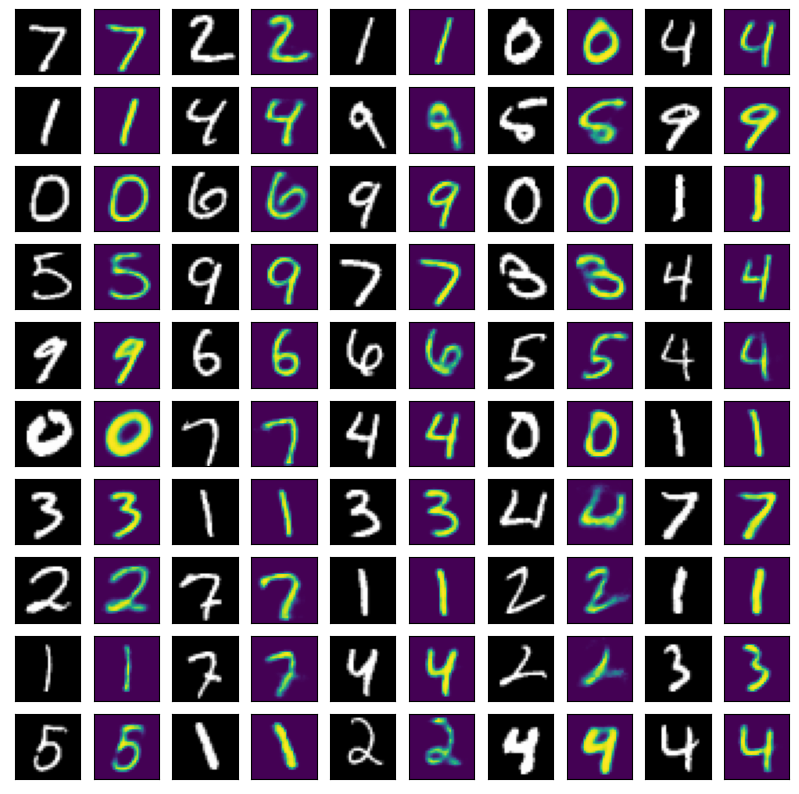

In [32]:
images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

100N

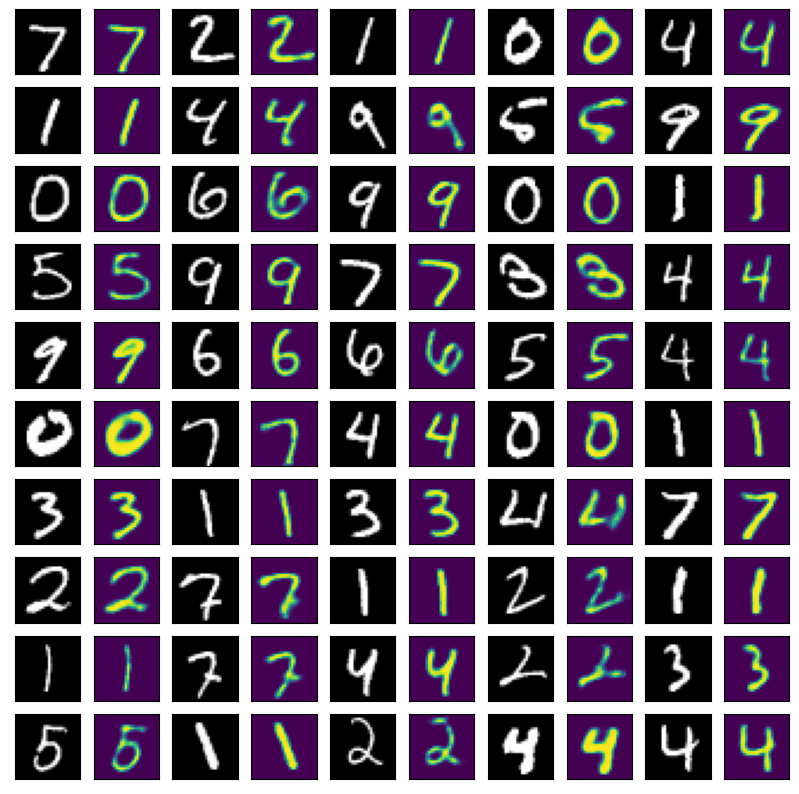

In [39]:
images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [40]:
mse=autoencoder.evaluate(test_images,test_images)

313/313 [==============================] - 1s 3ms/step - loss: 0.0809


In [41]:
performance=pd.concat([performance,pd.DataFrame({"model":'100N',"MSE-loss":mse},index=[0])])
performance

,model,MSE-loss
0,6N,0.133219
0,16N,0.093220
0,100N,0.080905


### Summary

After executing the above model with 6N,16N,100N. The better performing model is 100N with MSE-loss of 0.080.